In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./data/Auto Sales data.csv")
df.sample(4)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
938,10304,26,85.87,8,2232.62,11/10/2019,1172,Shipped,Vintage Cars,104,S18_3136,Auto Assoc. & Cie.,30.59.8555,"67, avenue de l'Europe",Versailles,78000,France,Tonini,Daniel,Small
1124,10172,48,114.44,8,5493.12,05/11/2018,1698,Shipped,Classic Cars,141,S18_3685,Gift Depot Inc.,2035552570,25593 South Bay Ln.,Bridgewater,97562,USA,King,Julie,Medium
1853,10373,46,66.00,11,3036.00,31/01/2020,1975,Shipped,Vintage Cars,65,S24_3420,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
1366,10148,25,60.26,6,1506.50,11/09/2018,1995,Shipped,Classic Cars,73,S24_1046,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,2060,Australia,O'Hara,Anna,Small


In [3]:
rows, columns = df.shape
print(f"Dataset with {rows} rows and {columns} columns.")

Dataset with 2747 rows and 20 columns.


PLT

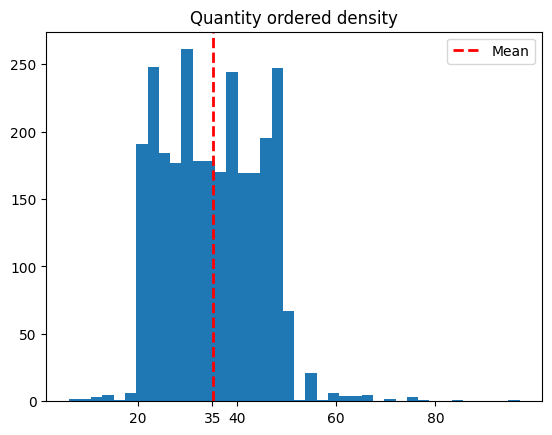

In [4]:
plt.hist(df["QUANTITYORDERED"], bins=40)
plt.title("Quantity ordered density")
plt.axvline(df["QUANTITYORDERED"].mean(), linestyle="dashed", color="red", linewidth=2, label="Mean")
plt.legend()
plt.xticks([20,40, round(df["QUANTITYORDERED"].mean(),0),60, 80])
plt.show()

SNS

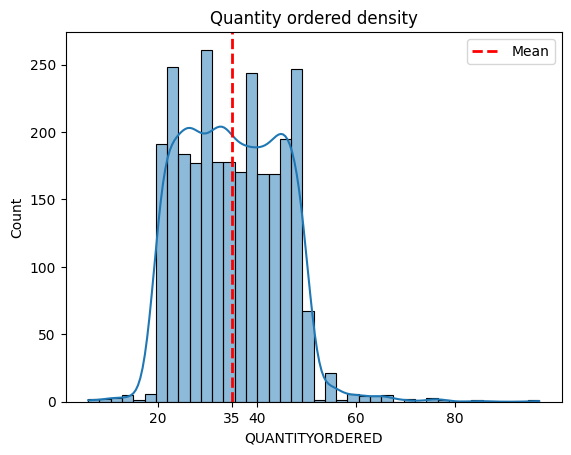

In [5]:
sns.histplot(data=df, x="QUANTITYORDERED", kde=True)
plt.title("Quantity ordered density")
plt.axvline(df["QUANTITYORDERED"].mean(), linestyle="dashed", color="red", linewidth=2, label="Mean")
plt.legend()
plt.xticks([20,40, round(df["QUANTITYORDERED"].mean(),0),60, 80])
plt.show()

In [6]:
productline_orders_count = df.groupby("PRODUCTLINE").count().reset_index()[["PRODUCTLINE", "SALES"]].rename(columns={"SALES" : "QUANTITY"})
productline_orders_sum = df.groupby("PRODUCTLINE").sum().reset_index()[["PRODUCTLINE", "SALES"]].rename(columns={"SALES" : "SUM_SALES"})
print("sum")
display(productline_orders_sum)
print("count")
display(productline_orders_count)

sum


,PRODUCTLINE,SUM_SALES
0,Classic Cars,3842868.54
1,Motorcycles,1103512.19
2,Planes,969323.42
3,Ships,700039.22
4,Trains,226243.47
5,Trucks and Buses,1111559.19
6,Vintage Cars,1806675.68


count


,PRODUCTLINE,QUANTITY
0,Classic Cars,949
1,Motorcycles,313
2,Planes,304
3,Ships,230
4,Trains,77
5,Trucks and Buses,295
6,Vintage Cars,579


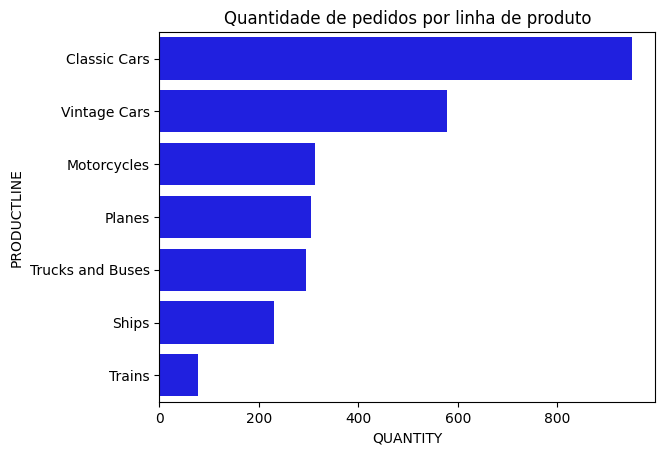

In [7]:
sns.barplot(productline_orders_count.sort_values(by="QUANTITY", ascending=False), x="QUANTITY", y="PRODUCTLINE", color="b")
plt.title("Quantidade de pedidos por linha de produto")
plt.show()

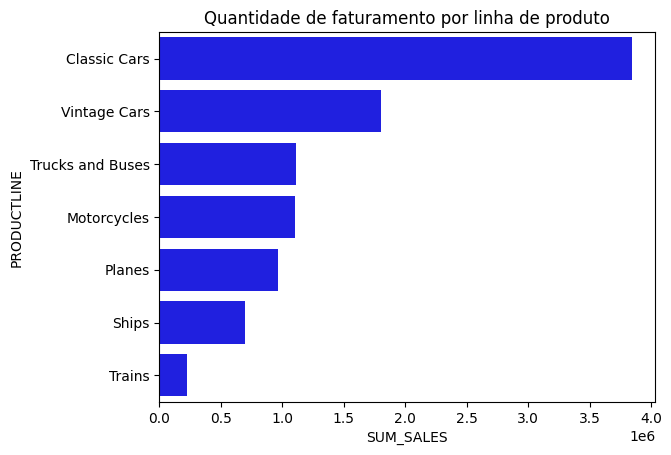

In [8]:
sns.barplot(productline_orders_sum.sort_values(by="SUM_SALES", ascending=False), x="SUM_SALES", y="PRODUCTLINE", color="b")
plt.title("Quantidade de faturamento por linha de produto")
plt.show()

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [10]:
city_sales = df.groupby(["COUNTRY", "CITY"]).sum().reset_index()[["COUNTRY", "CITY", "SALES"]].sort_values(by="SALES", ascending=False)
city_sales.head()


,COUNTRY,CITY,SALES
41,Spain,Madrid,1082551.44
69,USA,San Rafael,654858.06
60,USA,NYC,560787.77
39,Singapore,Singapore,288488.41
21,France,Paris,268944.68


In [11]:
city_sales.tail()

,COUNTRY,CITY,SALES
5,Austria,Graz,52263.90
54,USA,Brisbane,50218.51
55,USA,Burbank,46084.64
28,Germany,Munich,34993.92
8,Belgium,Charleroi,33440.10


[]

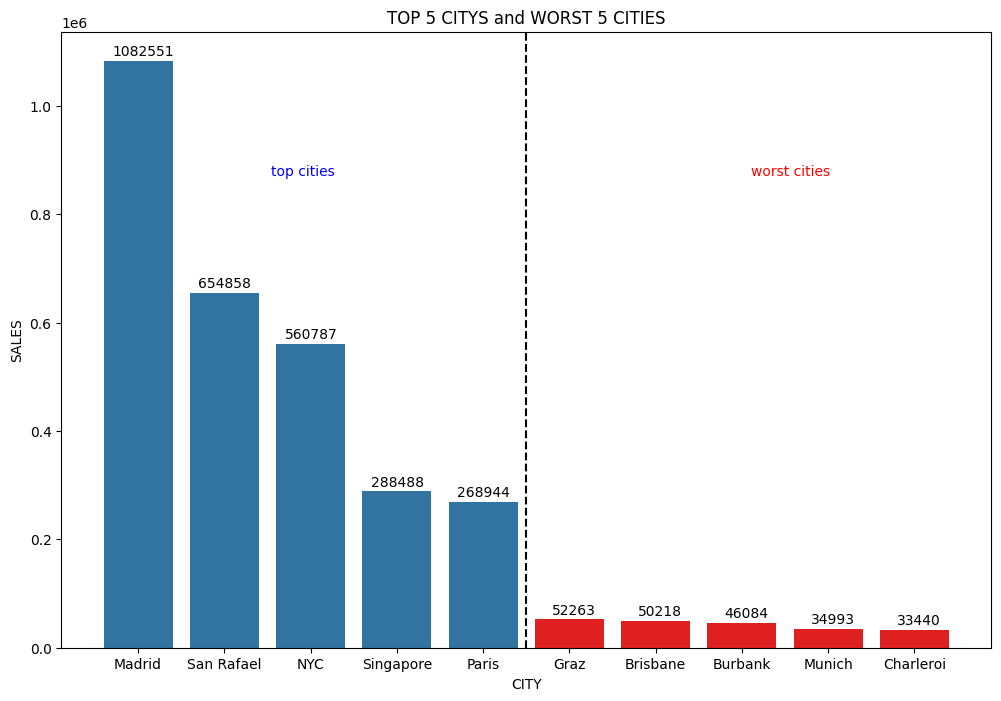

In [12]:
plt.figure(figsize=[12,8])
sns.barplot(city_sales.head(), x="CITY", y="SALES").set(title="TOP 5 CITYS and WORST 5 CITIES")
sns.barplot(city_sales.tail(), x="CITY", y="SALES", color="red")
plt.axvline(x=4.5, color="black", linestyle="dashed")
plt.figtext(0.7,0.7, "worst cities", color="red")
plt.figtext(0.3,0.7, "top cities", color="blue")
for index,data in enumerate(city_sales.head()["SALES"]):
    plt.text(x=index-0.3 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
for index,data in enumerate(city_sales.tail()["SALES"]):
    plt.text(x=index+ 4.8 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
plt.plot()

In [13]:
country_sales = df.groupby("COUNTRY").sum().reset_index()[["COUNTRY", "SALES"]].sort_values(by="SALES", ascending=False)
country_sales.head()

,COUNTRY,SALES
18,USA,3355575.69
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46


In [14]:
country_sales.tail()

,COUNTRY,SALES
10,Japan,188167.81
16,Switzerland,117713.56
2,Belgium,108412.62
12,Philippines,94015.73
8,Ireland,57756.43


[]

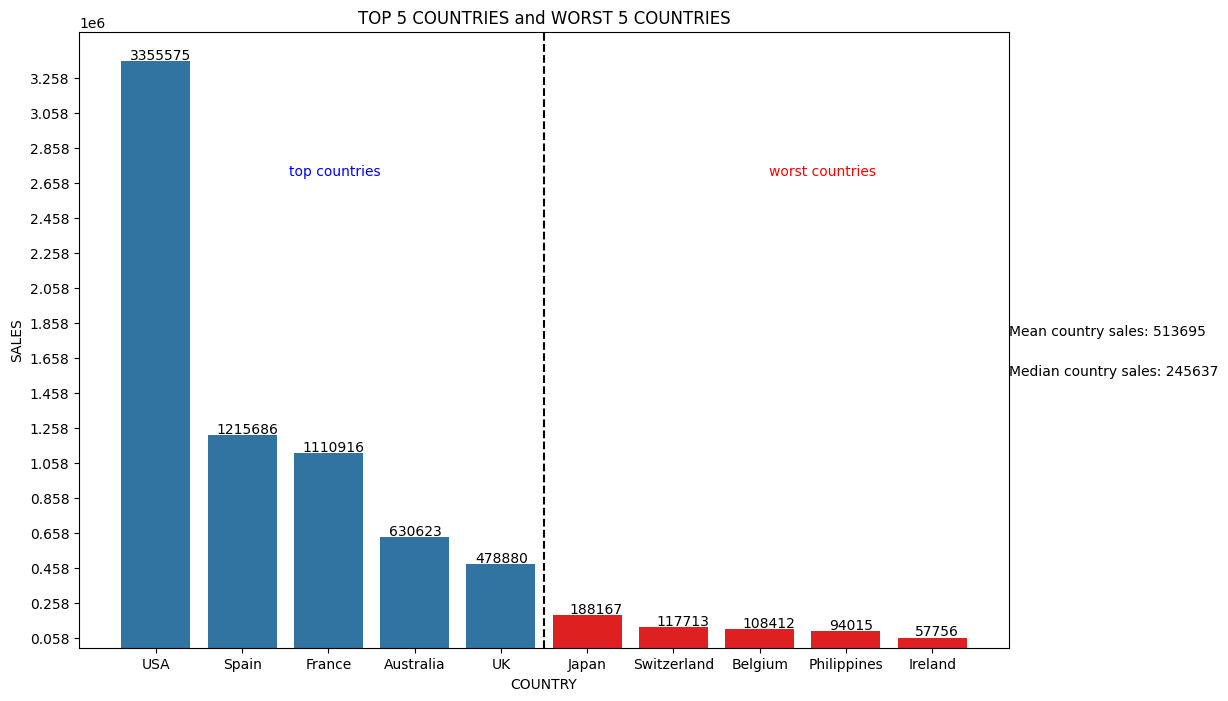

In [15]:
plt.figure(figsize=[12,8])
sns.barplot(country_sales.head(), x="COUNTRY", y="SALES").set(title="TOP 5 COUNTRIES and WORST 5 COUNTRIES")
sns.barplot(country_sales.tail(), x="COUNTRY", y="SALES", color="red")
plt.axvline(x=4.5, color="black", linestyle="dashed")
plt.figtext(0.7,0.7, "worst countries", color="red")
plt.figtext(0.3,0.7, "top countries", color="blue")
mean = int(country_sales["SALES"].mean())
median = int(country_sales["SALES"].median())
plt.yticks(range(int(country_sales.tail()["SALES"].min()), int(country_sales.head()["SALES"].max()), 200000))
plt.figtext(0.9,0.5, f"Mean country sales: {mean}", color="black")
plt.figtext(0.9,0.45, f"Median country sales: {median}", color="black")
for index,data in enumerate(country_sales.head()["SALES"]):
    plt.text(x=index-0.3 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
for index,data in enumerate(country_sales.tail()["SALES"]):
    plt.text(x=index+ 4.8 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
plt.plot()


In [24]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df["ORDERDATE"]

0      2018-02-24
1      2018-05-07
2      2018-07-01
3      2018-08-25
4      2018-10-28
          ...    
2742   2019-12-02
2743   2020-01-31
2744   2020-03-01
2745   2020-03-28
2746   2020-05-06
Name: ORDERDATE, Length: 2747, dtype: datetime64[ns]

In [30]:
df["DAY"] = df['ORDERDATE'].dt.day
df["MONTH"] = df["ORDERDATE"].dt.month


In [29]:
df.sample()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAY,MONTH
18,10341,41,188.73,9,7737.93,2019-11-24,208,Shipped,Motorcycles,95,...,6562-9555,Geislweg 14,Salzburg,5020,Austria,Pipps,Georg,Large,24,11


here we could set the colour for each unique product line

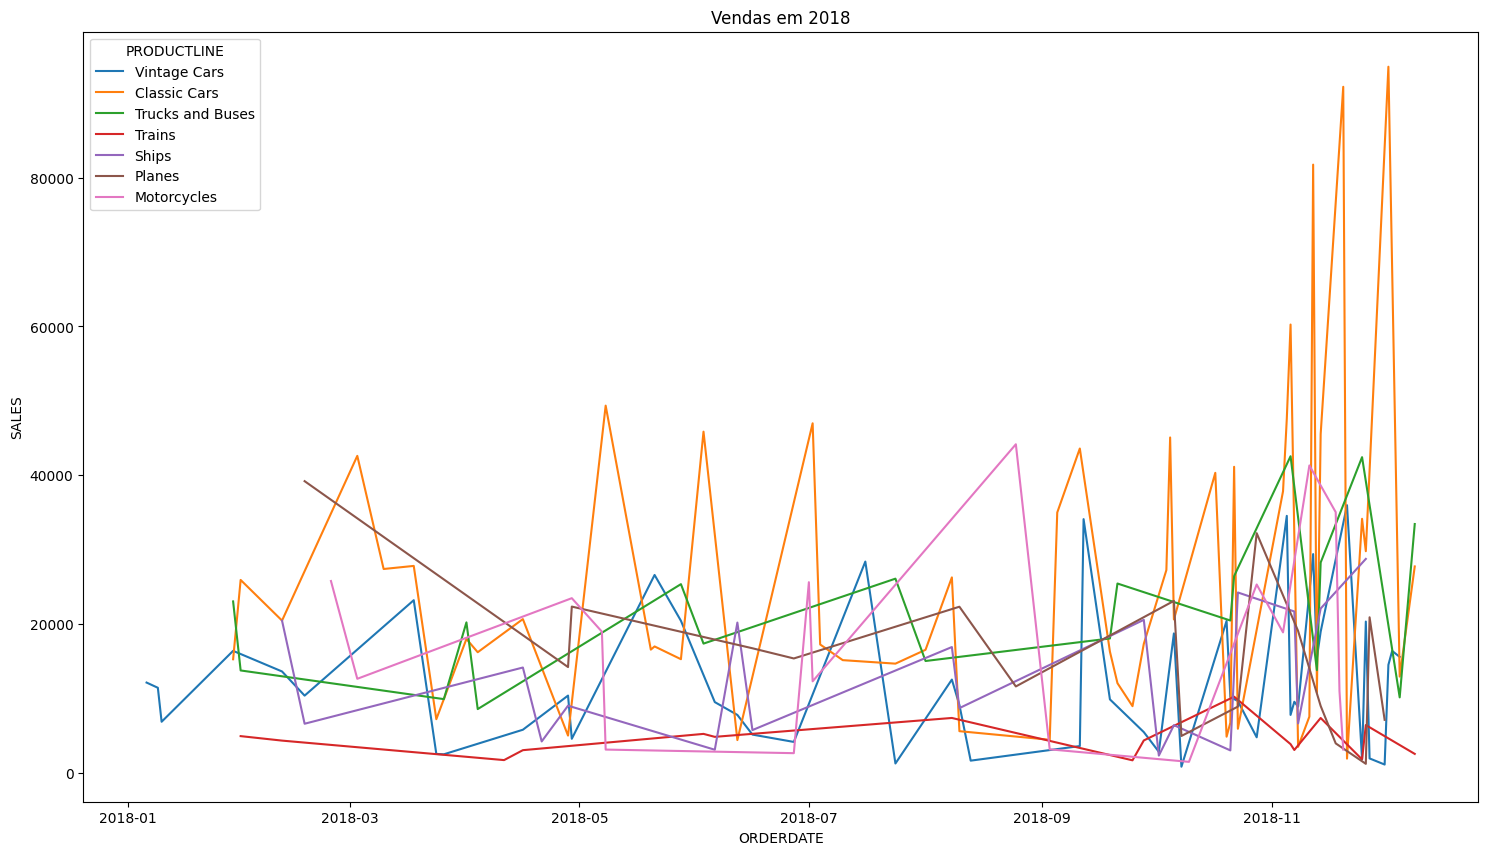

In [59]:
order_date_sales = df.groupby(["ORDERDATE", "PRODUCTLINE"]).sum().reset_index()
order_date_sales = order_date_sales[["ORDERDATE", "PRODUCTLINE", "SALES"]]
order_date_sales2018 = order_date_sales[order_date_sales["ORDERDATE"].dt.year == 2018]
order_date_sales2019 = order_date_sales[order_date_sales["ORDERDATE"].dt.year == 2019]
order_date_sales2020 = order_date_sales[order_date_sales["ORDERDATE"].dt.year == 2020]
plt.figure(figsize=[18,10])
sns.lineplot(x="ORDERDATE", data=order_date_sales2018, y="SALES", hue="PRODUCTLINE").set(title="Vendas em 2018")
plt.show()

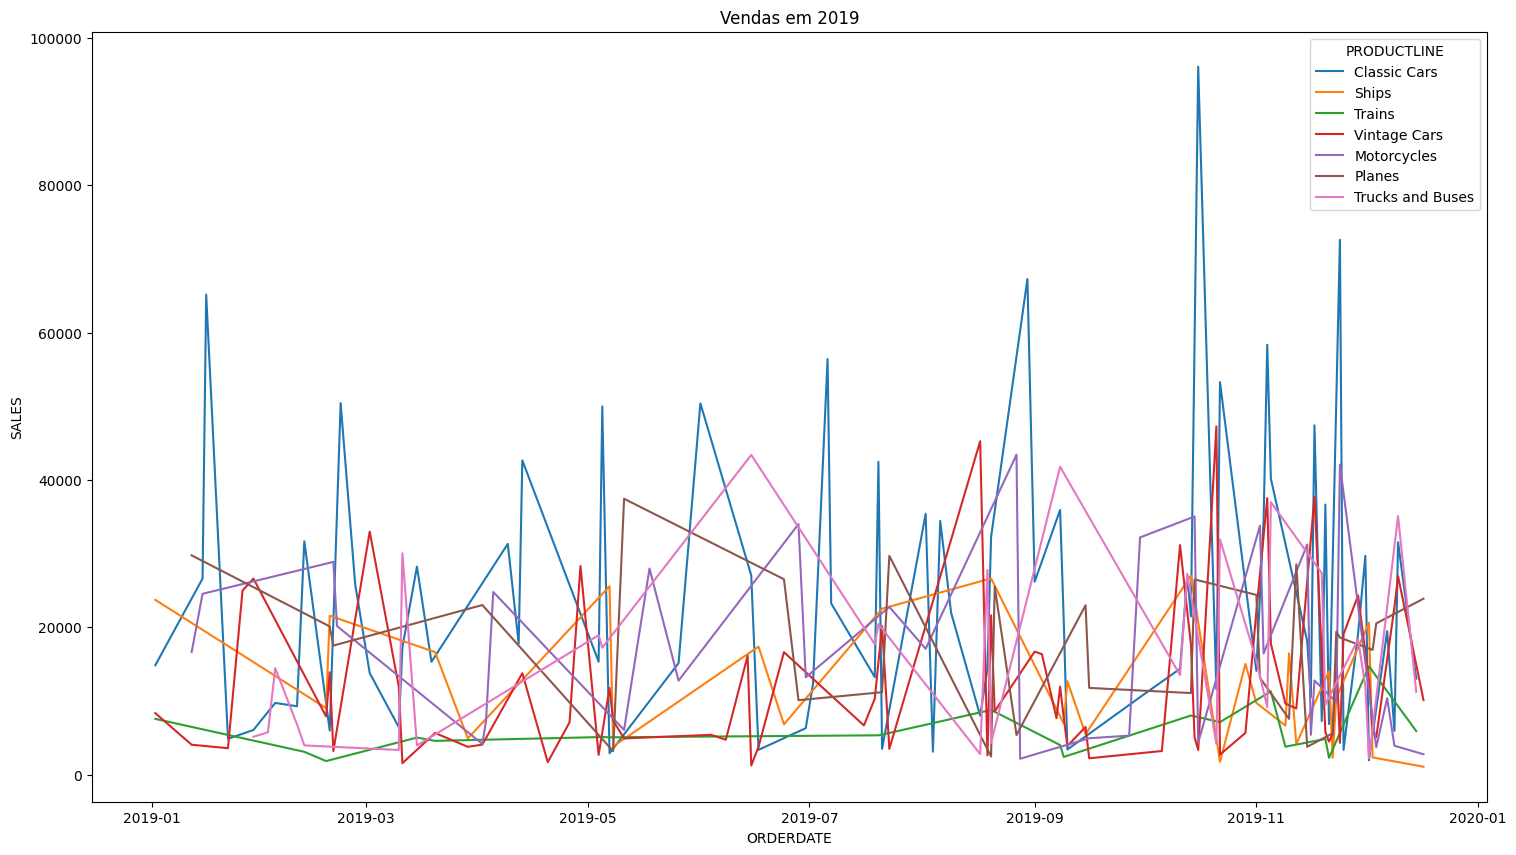

In [60]:
plt.figure(figsize=[18,10])
sns.lineplot(x="ORDERDATE", data=order_date_sales2019, y="SALES", hue="PRODUCTLINE").set(title="Vendas em 2019")
plt.show()

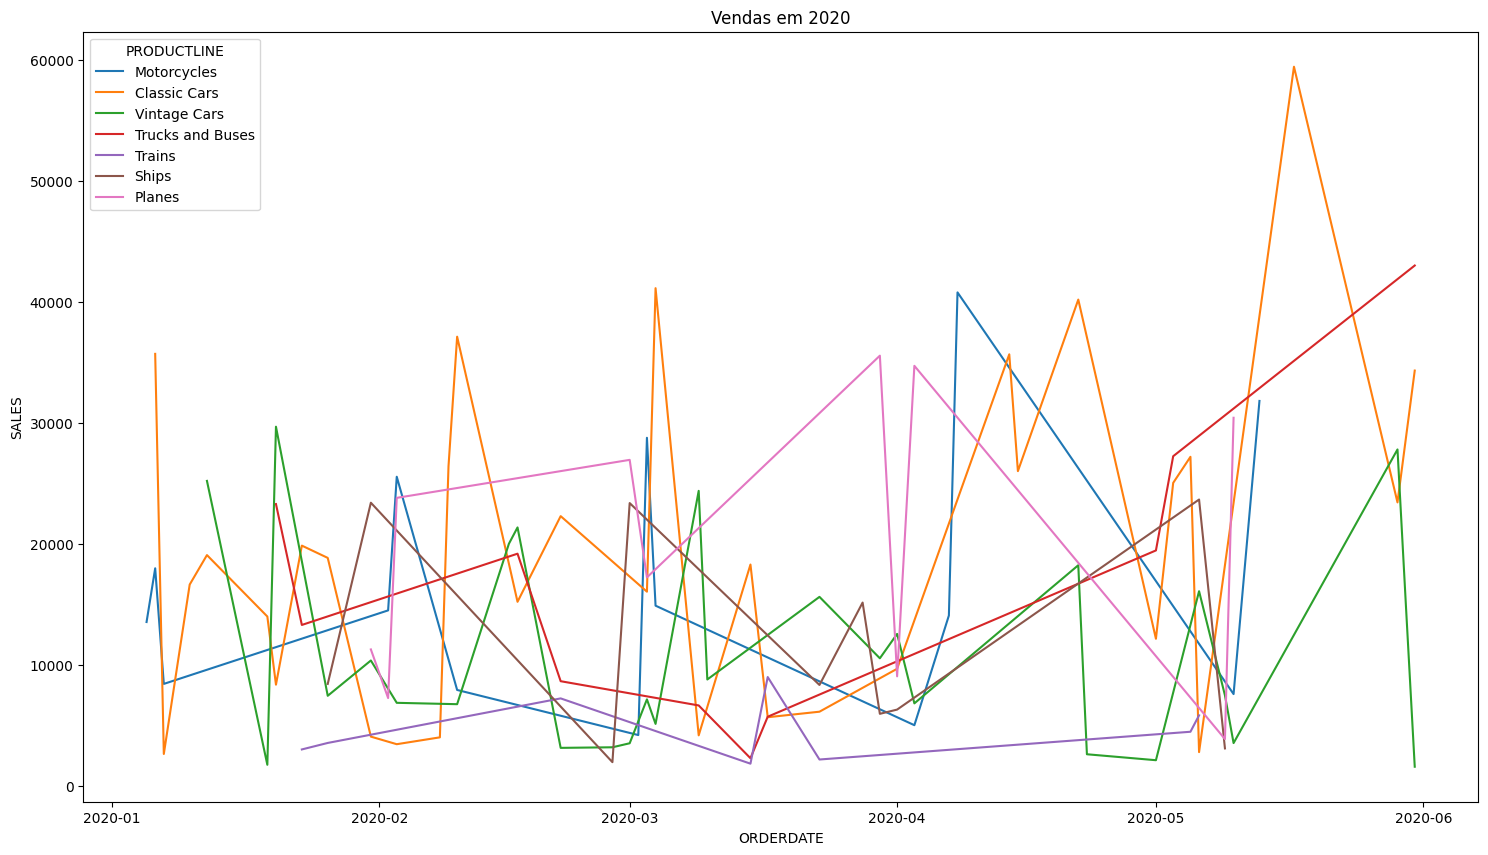

In [61]:
plt.figure(figsize=[18,10])
sns.lineplot(x="ORDERDATE", data=order_date_sales2020, y="SALES", hue="PRODUCTLINE").set(title="Vendas em 2020")
plt.show()

it's easy to hurt visualization, notice yaxis, range is not the same, if you look well you are going to see that max value changes by a lot deceiving the viewer

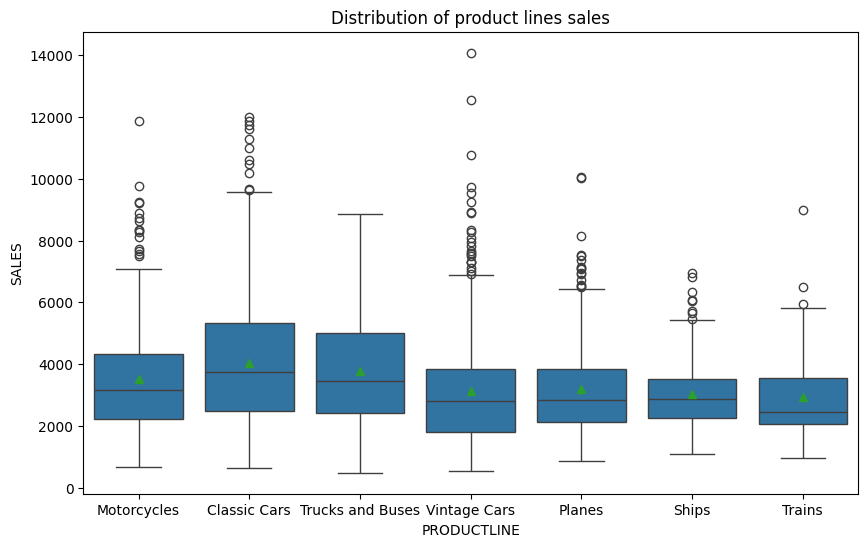

In [70]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df, x="PRODUCTLINE", y="SALES", showmeans=True).set(title="Distribution of product lines sales")
plt.show()

All means are above the medians, visible on box graph, this is the result of so many outliers.